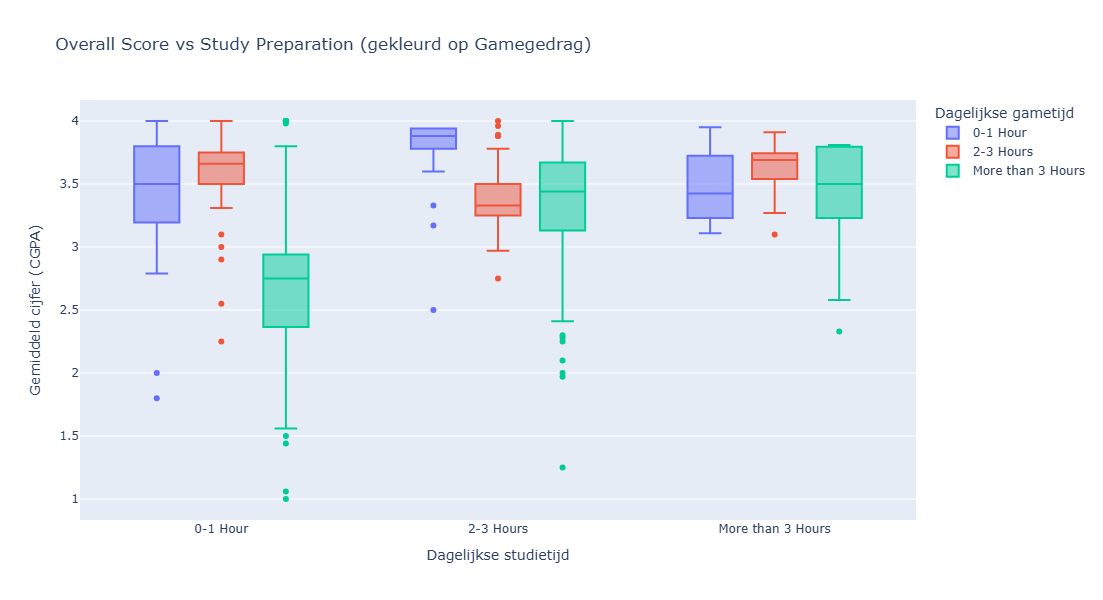

In [1]:
# Run eerste deze cel voordat je verder gaat 

# Hieronder de libraries die gebruikt zijn
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Hieronder laad je de datasets in
df1 = pd.read_csv("StudentPerformanceFactors.csv")
df2 = pd.read_csv("gameandgrade.csv")
df3 = pd.read_csv("ResearchInformation3.csv")

# Letop! krijg je een error dan heb je waarschijlijk een andere naam aan de datasets gegeven 
# of de datasets staan niet in dezelfde map als de jupyter notebook 
# Houd alleen relevante kolommen over
df3_clean = df3[["Preparation", "Gaming", "Overall"]].dropna().copy()

# Standaardiseer de ordinale categorieën
prep_order = ["0-1 Hour", "2-3 Hours", "More than 3 Hours"]
game_order = ["0-1 Hour", "2-3 Hours", "More than 3 Hours"]

df3_clean = df3_clean[df3_clean["Preparation"].isin(prep_order)]
df3_clean["Preparation"] = pd.Categorical(df3_clean["Preparation"], categories=prep_order, ordered=True)

df3_clean = df3_clean[df3_clean["Gaming"].isin(game_order)]
df3_clean["Gaming"] = pd.Categorical(df3_clean["Gaming"], categories=game_order, ordered=True)

# Layout aanpassen
fig = px.box(
    df3_clean,
    x="Preparation",
    y="Overall",
    color="Gaming",
    title="Overall Score vs Study Preparation (gekleurd op Gamegedrag)",
    labels={
        "Preparation": "Dagelijkse studietijd",
        "Overall": "Gemiddeld cijfer (CGPA)",
        "Gaming": "Dagelijkse gametijd"
    },
    category_orders={
        "Preparation": prep_order,
        "Gaming": game_order
    },
    height= 600
)

fig.show()